In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data/preprocessed_data.csv')

In [10]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
cancer_type_counts = df['cancer_type'].value_counts()
df['content'] = df['content'].astype(str)
df['content_length'] = df['content'].apply(lambda x: len(x.split()))
df['log_content_length'] = np.log10(df['content_length'] + 1)

from textblob import TextBlob
df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [12]:
# Predictive Modeling
# Building a simple linear regression model to predict sentiment based on content length

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare data
X = df[['log_content_length']]
y = df['sentiment']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.027260156607933184


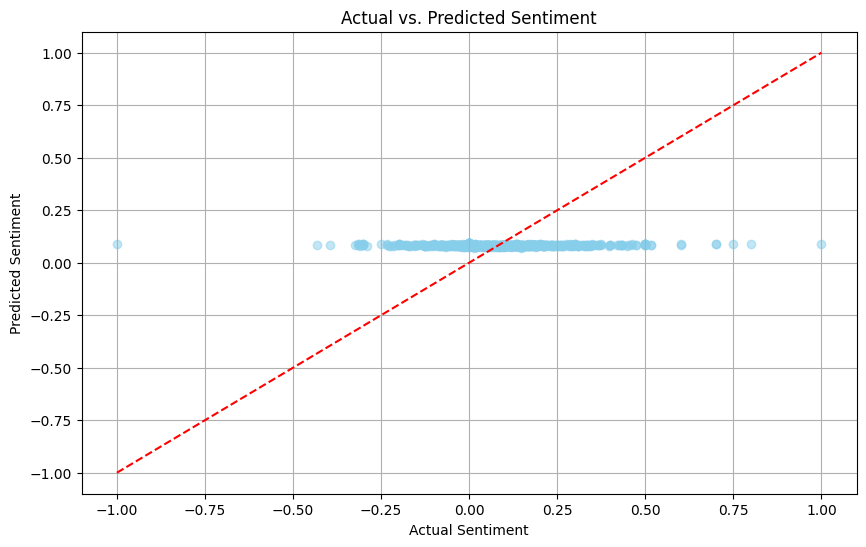

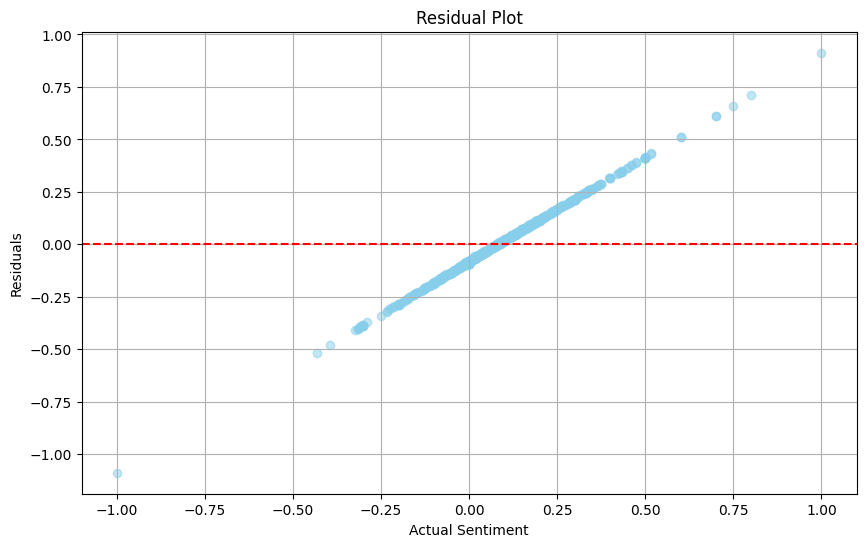

In [14]:
#vizualise predictive modelling results
import matplotlib.pyplot as plt

# Plot actual vs. predicted sentiment
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='skyblue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Sentiment')
plt.xlabel('Actual Sentiment')
plt.ylabel('Predicted Sentiment')
plt.grid(True)
plt.show()

# Visualize Residuals
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_test, residuals, color='skyblue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Sentiment')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import numpy as np

# Feature Engineering: Polynomial Regression
degree = 2  # Adjust the degree of the polynomial as needed
poly_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.1))
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# Evaluate Polynomial Regression Model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Regression - Mean Squared Error:", mse_poly)
print("Polynomial Regression - R^2 Score:", r2_poly)


Polynomial Regression - Mean Squared Error: 0.02717881003557387
Polynomial Regression - R^2 Score: 0.0044533103548781705


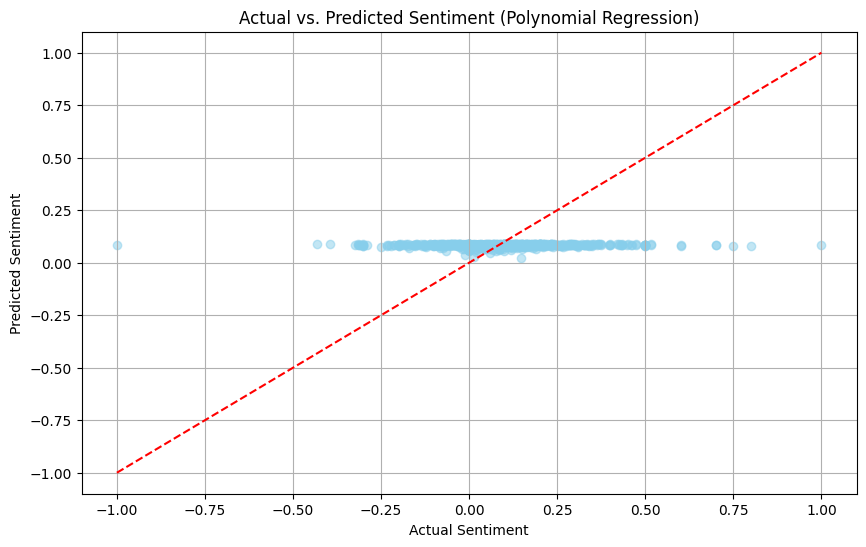

In [16]:
#Visualize Actual vs. Predicted Sentiment (Polynomial Regression)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='skyblue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Sentiment (Polynomial Regression)')
plt.xlabel('Actual Sentiment')
plt.ylabel('Predicted Sentiment')
plt.grid(True)
plt.show()

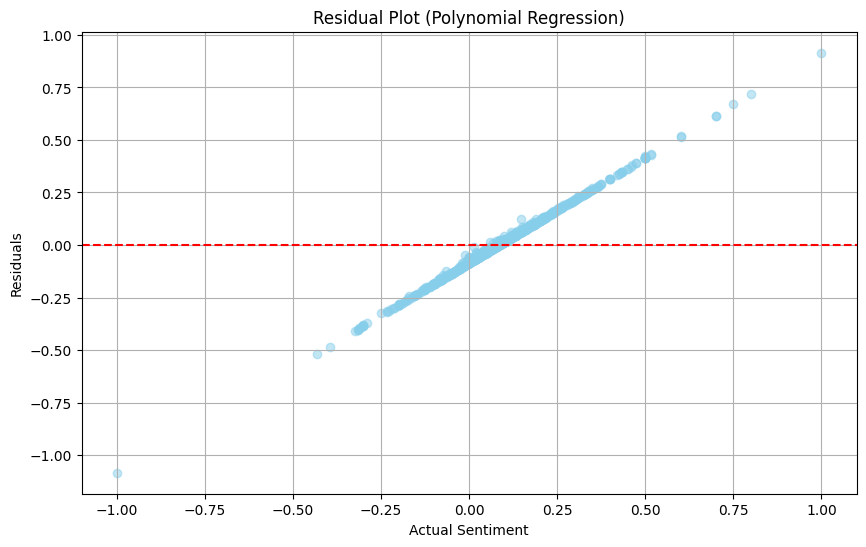

In [18]:
# Residual Analysis (Polynomial Regression)
residuals_poly = y_test - y_pred_poly
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_poly, color='skyblue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (Polynomial Regression)')
plt.xlabel('Actual Sentiment')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()